## RNN model fitting

This notebook contains the fitting of the Recurrent Neural Network with LSTM cells to all series in the dataset at the same time.

In [1]:
import os
import sys
import pickle
import pandas as pd
import matplotlib.pyplot as plt

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from RNN.model_selection import RNNHyperTune
from RNN.data_processing import window_dataset
from DataSimulation.utils import plot_fit

In [2]:
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.0,173.0,143.0,11.0,2.0,937.0,81.0,52.0,27.0,20.0,...,11.0,43.0,15.0,56.0,155.0,1.0,2.0,3.0,82.0,8.0
1,1.0,267.0,104.0,3.0,2.0,43.0,36.0,7.0,23.0,10.0,...,12.0,4.0,8.0,28.0,13.0,0.0,7.0,4.0,65.0,10.0
2,5.0,102.0,73.0,12.0,1.0,714.0,35.0,44.0,29.0,3.0,...,16.0,22.0,29.0,42.0,13.0,0.0,1.0,3.0,87.0,20.0
3,11.0,115.0,100.0,5.0,0.0,2662.0,15.0,38.0,22.0,10.0,...,12.0,15.0,16.0,67.0,9.0,1.0,2.0,3.0,67.0,28.0
4,0.0,73.0,137.0,9.0,0.0,1063.0,73.0,77.0,29.0,5.0,...,10.0,24.0,13.0,25.0,45.0,4.0,1.0,1.0,79.0,26.0


In [3]:
test_size = 4*24
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(904, 100)
(96, 100)


In [4]:
parameters = {
    'lstm_units':[16,32,64],
    'learning_rate':[0.01, 0.001, 0.0001],
    'batch_size':[32,64,128],
}
rnn_hypertune = RNNHyperTune(100, 24, parameters)

In [5]:
rnn_model, scaler = rnn_hypertune.fit(
    data=train_data,
    checkpoint_path=os.path.join(os.getcwd(), 'checkpoint'),
    epochs=500
)

Training model 0/108.
minimum 0 model's validation loss: 0.02136557549238205.
Training model 1/108.
minimum 1 model's validation loss: 0.021248240023851395.
Training model 2/108.
minimum 2 model's validation loss: 0.021633554250001907.
Training model 3/108.
minimum 3 model's validation loss: 0.021499570459127426.
Training model 4/108.
minimum 4 model's validation loss: 0.021347451955080032.
Training model 5/108.
minimum 5 model's validation loss: 0.021252188831567764.
Training model 6/108.
minimum 6 model's validation loss: 0.021508028730750084.
Training model 7/108.
minimum 7 model's validation loss: 0.021455936133861542.
Training model 8/108.
minimum 8 model's validation loss: 0.021328553557395935.
Training model 9/108.
minimum 9 model's validation loss: 0.021248584613204002.
Training model 10/108.
minimum 10 model's validation loss: 0.021522311493754387.
Training model 11/108.
minimum 11 model's validation loss: 0.02148997224867344.
Training model 12/108.
minimum 12 model's validati

tiempo: 237m, 32.6s

In [6]:
rnn_model.summary()

Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_164 (LSTM)             (None, 24, 32)            17024     
                                                                 
 lstm_165 (LSTM)             (None, 24, 32)            8320      
                                                                 
 dense_109 (Dense)           (None, 24, 100)           3300      
                                                                 
Total params: 28,644
Trainable params: 28,644
Non-trainable params: 0
_________________________________________________________________


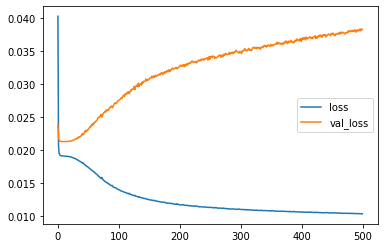

In [7]:
df = pd.DataFrame(rnn_hypertune.history.history)
df.plot(y=['loss', 'val_loss'])
plt.show()

In [8]:
scaled_data = scaler.transform(data)

In [9]:
eval_ds = window_dataset(
    data=scaled_data,
    sequence_lenght=24,
    output_lenght=24,
    batch_size=scaled_data.shape[0],
    shift=1,
    shuffle=False    
)

In [10]:
fit_values = rnn_model.predict(eval_ds)
fit_0 = fit_values[:,0,:]

1/1 [==============================] - 1s 767ms/step


In [11]:
orig_scale = scaler.inverse_transform(fit_0)

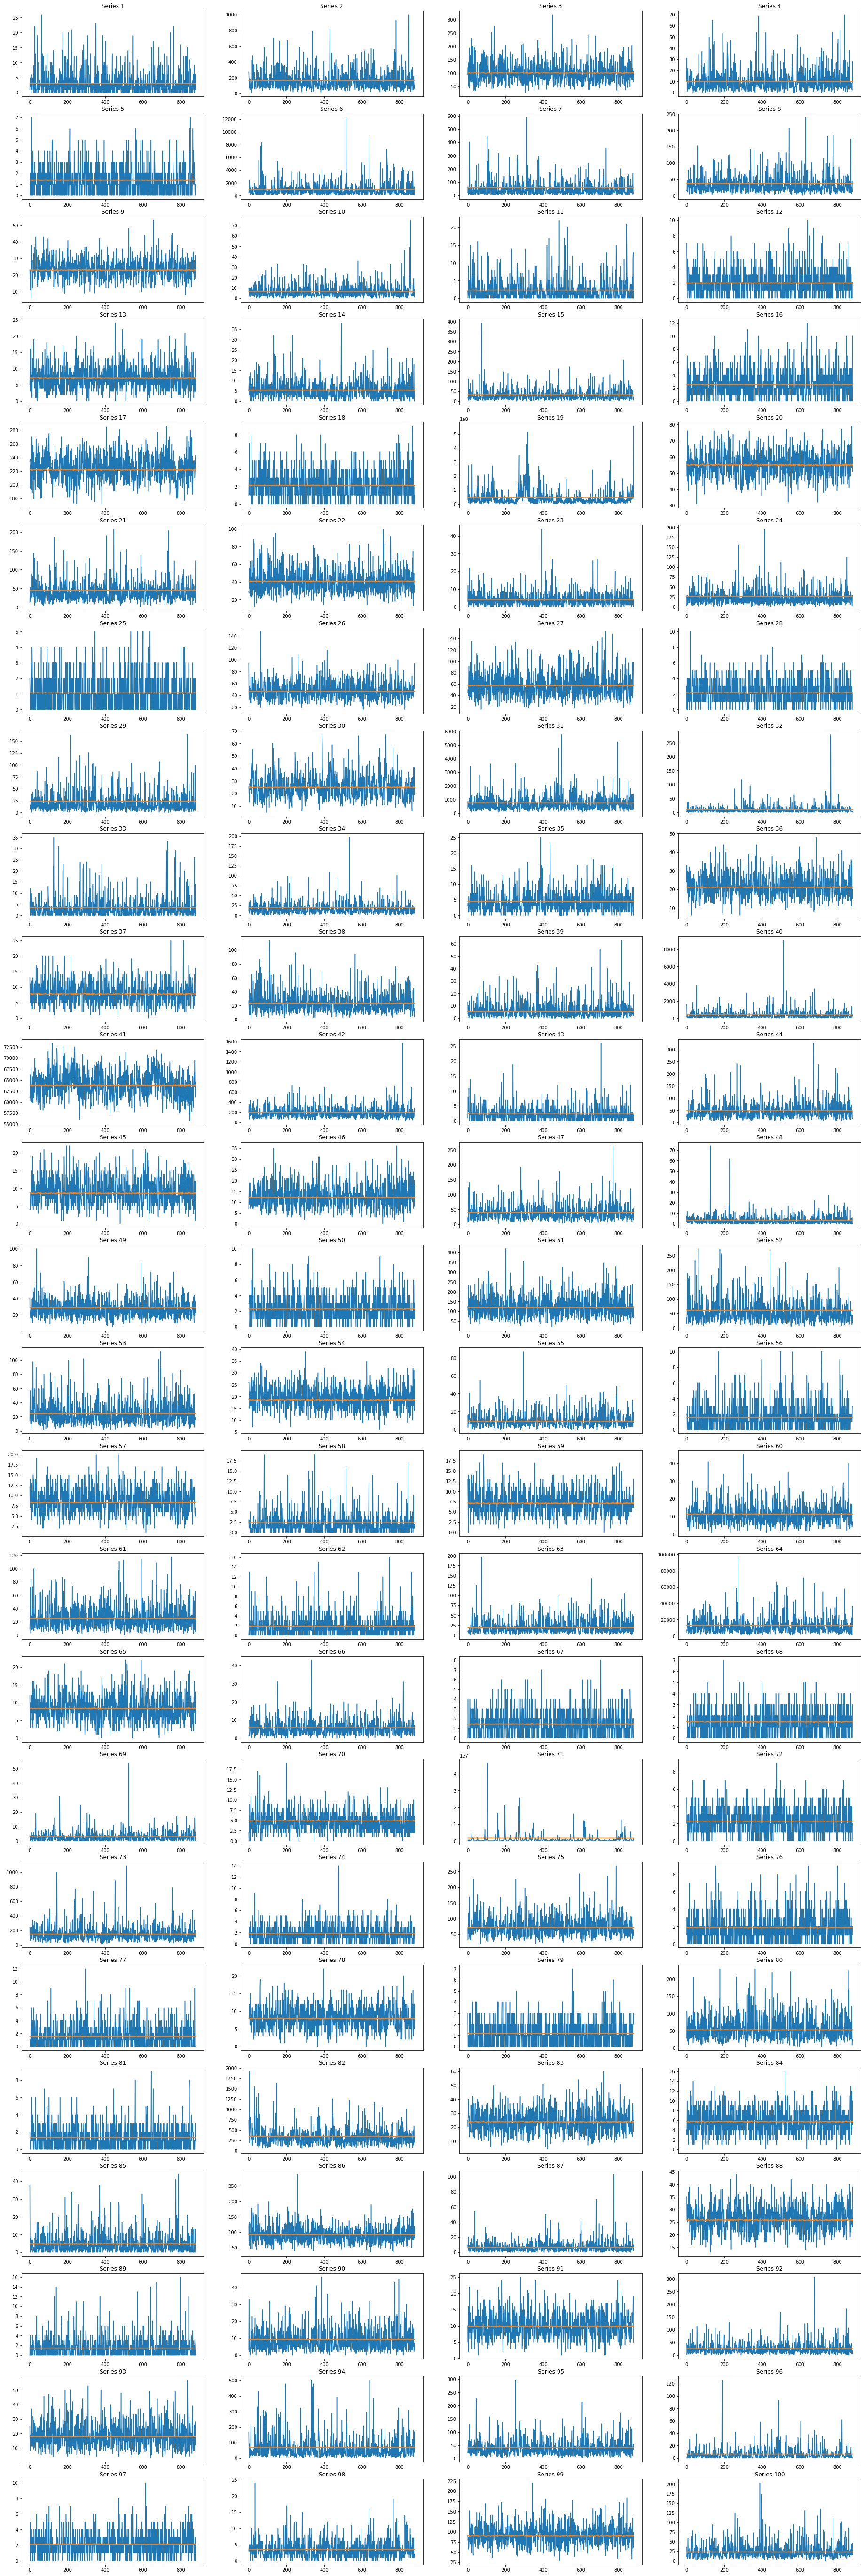

In [12]:
plot_fit(train_data[24:], orig_scale[:-3*24])

In [32]:
rnn_model.save("rnn.h5")

In [33]:
with open("rnn_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)